In [ ]:
!pip install https://github.com/fastai/fastai/archive/master.zip 
!pip install fastai==0.7.0 
!pip install torchtext==0.2.3 
!pip install opencv-python 
!apt update && apt install -y libsm6 libxext6 
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision
!pip install --upgrade git+https://github.com/valeoai/dl_utils.git
!pip install --upgrade imageio
!pip install libsixel-python
!pip install -U pillow

  Using cached https://github.com/fastai/fastai/archive/master.zip
  Using cached fastai-0.7.0-py3-none-any.whl (112 kB)
ERROR: Could not find a version that satisfies the requirement torch<0.4 (from fastai) (from versions: 1.0.0, 1.0.1, 1.0.1.post2, 1.1.0, 1.2.0, 1.3.0, 1.3.1, 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2, 1.11.0)
ERROR: No matching distribution found for torch<0.4
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 https://developer

In [ ]:
# import os
# if not os.path.isdir('./VOCdevkit/'):
#     ! wget http://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
#     ! tar -xf VOCtrainval_06-Nov-2007.tar
#     ! wget https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip
#     ! unzip -q PASCAL_VOC.zip -d VOCdevkit/VOC2007
#     ! mv /content/gdrive/My\ Drive/Colab\ Notebooks/Practical_DL_ITI_2019_CV/voc2coco/pascal_train2007.json VOCdevkit/VOC2007/pascal_train2007.json 
#     ! rm -Rf VOCdevkit/VOC2007/PASCAL_VOC

In [ ]:
%matplotlib inline 
%reload_ext autoreload 
%autoreload 2

In [ ]:
!pip install image

In [ ]:
from pathlib import Path 
import json 
import PIL 
from matplotlib import patches, patheffects
import keras
from keras.models import Sequential, Model 
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Dropout, Flatten,Dense
from tensorflow.keras.optimizers import Adam

import numpy as np
import os
from matplotlib import image,patches,patheffects
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
PATH = Path('VOCdevkit/VOC2007/')
for i in PATH.iterdir(): print(i)
    
JPEGS = PATH/'JPEGImages'

VOCdevkit/VOC2007/ImageSets
VOCdevkit/VOC2007/SegmentationClass
VOCdevkit/VOC2007/JPEGImages
VOCdevkit/VOC2007/Annotations
VOCdevkit/VOC2007/pascal_train2007.json
VOCdevkit/VOC2007/SegmentationObject


In [ ]:
[i for i in PATH.iterdir()]

[PosixPath('VOCdevkit/VOC2007/ImageSets'),
 PosixPath('VOCdevkit/VOC2007/SegmentationClass'),
 PosixPath('VOCdevkit/VOC2007/JPEGImages'),
 PosixPath('VOCdevkit/VOC2007/Annotations'),
 PosixPath('VOCdevkit/VOC2007/pascal_train2007.json'),
 PosixPath('VOCdevkit/VOC2007/SegmentationObject')]

In [ ]:
list(PATH.iterdir())

[PosixPath('VOCdevkit/VOC2007/ImageSets'),
 PosixPath('VOCdevkit/VOC2007/SegmentationClass'),
 PosixPath('VOCdevkit/VOC2007/JPEGImages'),
 PosixPath('VOCdevkit/VOC2007/Annotations'),
 PosixPath('VOCdevkit/VOC2007/pascal_train2007.json'),
 PosixPath('VOCdevkit/VOC2007/SegmentationObject')]

In [ ]:
o = list(PATH.iterdir())[0]
o

PosixPath('VOCdevkit/VOC2007/ImageSets')

In [ ]:
str(o)

'VOCdevkit/VOC2007/ImageSets'

In [ ]:
!unzip /content/pascal_train2007.json.zip

unzip:  cannot find or open /content/pascal_train2007.json.zip, /content/pascal_train2007.json.zip.zip or /content/pascal_train2007.json.zip.ZIP.


In [ ]:
import json

BD = json.load(open('VOCdevkit/VOC2007/pascal_train2007.json')) # it loads a dictionary

print('the dictionary of keys: ',BD.keys())

the dictionary of keys:  dict_keys(['images', 'type', 'annotations', 'categories'])


In [ ]:
# Then, we can acces to the image
BD['images'][:5]

[{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500},
 {'file_name': '000017.jpg', 'height': 364, 'id': 17, 'width': 480},
 {'file_name': '000023.jpg', 'height': 500, 'id': 23, 'width': 334},
 {'file_name': '000026.jpg', 'height': 333, 'id': 26, 'width': 500},
 {'file_name': '000032.jpg', 'height': 281, 'id': 32, 'width': 500}]

In [ ]:
IMAGES , ANNOTATIONS, CATEGORIES = ['images','annotations','categories']
BD[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500},
 {'file_name': '000017.jpg', 'height': 364, 'id': 17, 'width': 480},
 {'file_name': '000023.jpg', 'height': 500, 'id': 23, 'width': 334},
 {'file_name': '000026.jpg', 'height': 333, 'id': 26, 'width': 500},
 {'file_name': '000032.jpg', 'height': 281, 'id': 32, 'width': 500}]

In [ ]:
BD[ANNOTATIONS][:2]

[{'area': 34104,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0,
  'image_id': 12,
  'iscrowd': 0,
  'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]},
 {'area': 13110,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0,
  'image_id': 17,
  'iscrowd': 0,
  'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]]}]

In [ ]:
BD[CATEGORIES][:4]

[{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'none'},
 {'id': 3, 'name': 'bird', 'supercategory': 'none'},
 {'id': 4, 'name': 'boat', 'supercategory': 'none'}]

In [ ]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

cats = dict((o[ID],o['name']) for o in BD[CATEGORIES])
trn_fns = dict((o[ID],o[FILE_NAME]) for o in BD[IMAGES])
trn_ids = [o[ID] for o in BD[IMAGES]]

In [ ]:
list(JPEGS.iterdir())[:5]

[PosixPath('VOCdevkit/VOC2007/JPEGImages/000354.jpg'),
 PosixPath('VOCdevkit/VOC2007/JPEGImages/001882.jpg'),
 PosixPath('VOCdevkit/VOC2007/JPEGImages/008905.jpg'),
 PosixPath('VOCdevkit/VOC2007/JPEGImages/007299.jpg'),
 PosixPath('VOCdevkit/VOC2007/JPEGImages/001182.jpg')]

In [ ]:
im0_d = BD[IMAGES][0]
im0_d[FILE_NAME],im0_d[ID]

('000012.jpg', 12)

In [ ]:
import collections

trn_anno = collections.defaultdict(lambda:[])
for o in BD[ANNOTATIONS]:
  if not o['ignore']:
    bb = o[BBOX]
    np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])
    trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))

len(trn_anno)

2501

In [ ]:
im_a = trn_anno[im0_d[ID]]
im_a

[([155, 96, 196, 174], 7)]

In [ ]:
im0_a = im_a[0]
im0_a

([155, 96, 196, 174], 7)

In [ ]:
cats[7]

'car'

In [ ]:
trn_anno[17]

[([184, 61, 95, 138], 15), ([89, 77, 314, 259], 13)]

In [ ]:
cats[15],cats[13]

('person', 'horse')

In [ ]:
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])

In [ ]:
im = Image.open(JPEGS/im0_d[FILE_NAME])

In [ ]:
def bb_hw(a): return np.array([a[0],a[1],a[2],a[3]])

In [ ]:
def show_img(im, figsize=None, ax=None):
  if not ax: fig,ax = plt.subplots(figsize=figsize)
  ax.imshow(im)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  return ax

In [ ]:
def draw_outline(o,lw):
  o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [ ]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [ ]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)   

In [ ]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8)) # That's why the image with draw_im is zoomed in
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)
        
def draw_idx(i):
    im_a = trn_anno[i]
    im = image.imread(JPEGS/trn_fns[i])
    draw_im(im, im_a)

([155, 96, 196, 174], 7)


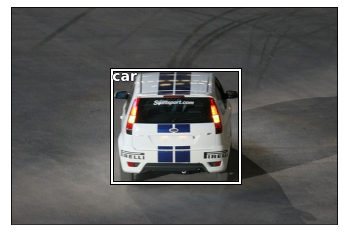

In [ ]:
ax = show_img(im)
print(im0_a)
b = bb_hw(im0_a[0])
draw_rect(ax,b)
draw_text(ax, b[:2],cats[im0_a[1]])

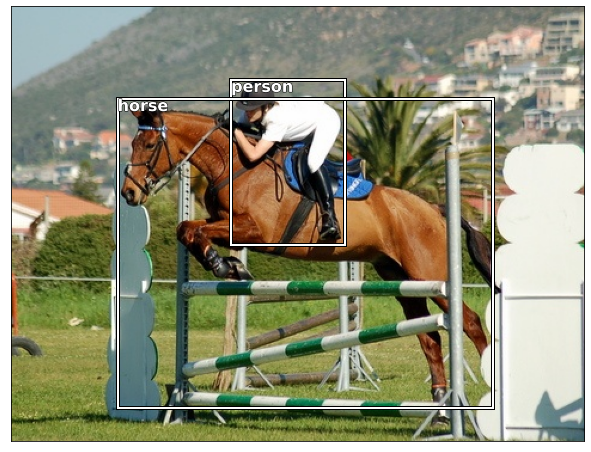

In [ ]:
draw_idx(17)

In [ ]:
def get_lrg(b):
  if not b: raise Exception()
  b = sorted(b, key=lambda x: np.multiply(x[0][2],x[0][3]),reverse=True) 
  return b[0]

In [ ]:
trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}

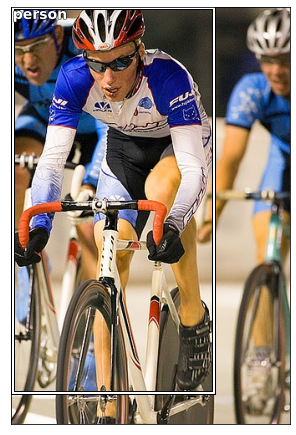

In [ ]:
b,c = trn_lrg_anno[23]
b = bb_hw(b)
ax = show_img(Image.open(JPEGS/trn_fns[23]),figsize=(5,10))
draw_rect(ax,b)
draw_text(ax, b[:2],cats[c])

In [ ]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [ ]:
import pandas as pd
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
                   'cat': [cats[trn_lrg_anno[o][1]] for o in trn_ids]}, columns=['fn','cat'])
df.to_csv(CSV,index=False)

In [ ]:
df[:5]

fn        cat
0  000012.jpg        car
1  000017.jpg      horse
2  000023.jpg     person
3  000026.jpg        car
4  000032.jpg  aeroplane

In [ ]:
# create a training and validation set
def Split_Train_Valid(df,Split_train_val=0.7):
  # step 1: shuffle the data
  df = df.reindex(np.random.permutation(df.index))
  df = df.set_index(np.arange(len(df)))

  # step 2: split in training and testing
  df_train = df[:int(len(df)*Split_train_val)]
  df_valid = df[int(len(df)*Split_train_val):]
  df_train = df_train.set_index(np.arange(len(df_train)))
  df_valid = df_valid.set_index(np.arange(len(df_valid)))

  return df_train,df_valid

df_train,df_valid = Split_Train_Valid(df,0.7)

In [ ]:
# our batch size
bs=32
# define the size of our input data
sz=224

# preprocess_input is for VGG16 in our case
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True) 

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) 

train_batches = train_datagen.flow_from_dataframe(df_train, # The df
                                                  JPEGS, # Place on desk
                                                  x_col='fn', # The column to get x
                                                  y_col='cat', # The column to get y
                                                  has_ext=True, 
                                                  target_size=(sz, sz), 
                                                  color_mode='rgb', 
                                                  classes=None, 
                                                  class_mode='categorical', 
                                                  batch_size=bs, 
                                                  shuffle=True)



valid_batches = valid_datagen.flow_from_dataframe(df_valid, 
                                                  JPEGS, 
                                                  x_col='fn', 
                                                  y_col='cat', 
                                                  has_ext=True, 
                                                  target_size=(sz, sz), 
                                                  color_mode='rgb', 
                                                  classes=list(train_batches.class_indices), 
                                                  class_mode='categorical', 
                                                  batch_size=bs, 
                                                  shuffle=False)

NbClasses = len(train_batches.class_indices)

Found 1750 validated image filenames belonging to 20 classes.
Found 751 validated image filenames belonging to 20 classes.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/pytho

In [ ]:
net = VGG16(include_top=False, weights='imagenet', input_shape=(sz,sz,3))
for layer in net.layers:
        layer.trainable=False

# we add our classification layer
x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(NbClasses, activation='softmax', name='softmax')(x)
model = Model(inputs=net.input, outputs=output_layer)
model.summary()        

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
epochs = 20

opt = Adam(learning_rate=1e-4)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_batches,
                              steps_per_epoch = train_batches.n // train_batches.batch_size,
                              epochs=epochs,
                              validation_data=valid_batches,
                              validation_steps = valid_batches.n // valid_batches.batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
54/54 [==============================] - 39s 512ms/step - loss: 25.2644 - accuracy: 0.2014 - val_loss: 13.0376 - val_accuracy: 0.4484
Epoch 2/20
54/54 [==============================] - 26s 479ms/step - loss: 15.6657 - accuracy: 0.3912 - val_loss: 10.6917 - val_accuracy: 0.5476
Epoch 3/20
54/54 [==============================] - 27s 481ms/step - loss: 11.6679 - accuracy: 0.4802 - val_loss: 9.3366 - val_accuracy: 0.5910
Epoch 4/20
54/54 [==============================] - 26s 479ms/step - loss: 9.9114 - accuracy: 0.5471 - val_loss: 8.8667 - val_accuracy: 0.6236
Epoch 5/20
54/54 [==============================] - 26s 479ms/step - loss: 8.7341 - accuracy: 0.5821 - val_loss: 8.0373 - val_accuracy: 0.6508
Epoch 6/20
54/54 [==============================] - 26s 478ms/step - loss: 7.2270 - accuracy: 0.6321 - val_loss: 7.5999 - val_accuracy: 0.6712
Epoch 7/20
54/54 [==============================] - 26s 478ms/step - loss: 6.8867 - accuracy: 0.6467 - val_loss: 7.3854 - val_accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


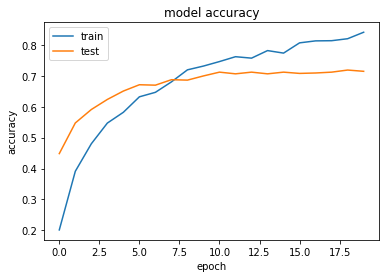

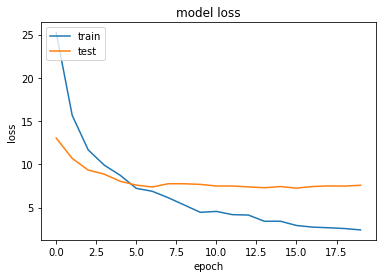

In [ ]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#unfreeze initial layers
FREEZE_LAYERS = 14

# free the first layers
for layer in model.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in model.layers[FREEZE_LAYERS:]:
    layer.trainable = True

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
54/54 [==============================] - 28s 494ms/step - loss: 1.8941 - acc: 0.8463 - val_loss: 6.4036 - val_acc: 0.7147
Epoch 2/10
54/54 [==============================] - 26s 488ms/step - loss: 1.6200 - acc: 0.8492 - val_loss: 5.8937 - val_acc: 0.7174
Epoch 3/10
54/54 [==============================] - 27s 489ms/step - loss: 1.6109 - acc: 0.8440 - val_loss: 5.4452 - val_acc: 0.7065
Epoch 4/10
54/54 [==============================] - 27s 497ms/step - loss: 1.4487 - acc: 0.8472 - val_loss: 5.2450 - val_acc: 0.7188
Epoch 5/10
54/54 [==============================] - 27s 491ms/step - loss: 1.2928 - acc: 0.8562 - val_loss: 5.0772 - val_acc: 0.7160
Epoch 6/10
54/54 [==============================] - 27s 492ms/step - loss: 1.2789 - acc: 0.8490 - val_loss: 5.2651 - val_acc: 0.7283
Epoch 7/10
54/54 [==============================] - 27s 491ms/step - loss: 1.2650 - acc: 0.8510 - val_loss: 4.7929 - val_acc: 0.7160
Epoch 8/10
54/54 [==============================] - 26s 486ms/step - 

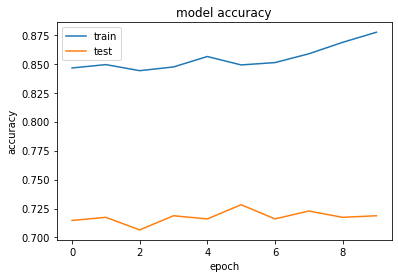

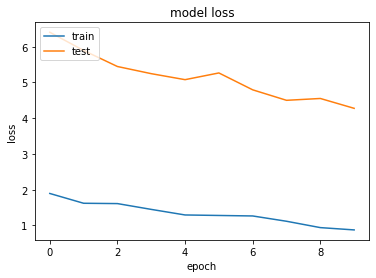

In [ ]:
epochs = 10

opt = Adam(lr=1e-5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit_generator(train_batches,
                              steps_per_epoch = train_batches.n // train_batches.batch_size,
                              epochs=epochs,
                              validation_data=valid_batches,
                              validation_steps = valid_batches.n // valid_batches.batch_size)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def deprocess_img(processed_img):
  x = processed_img.copy()
  if len(x.shape) == 4:
    x = np.squeeze(x, 0)
  assert len(x.shape) == 3, ("Input to deprocess image must be an image of "
                             "dimension [1, height, width, channel] or [height, width, channel]")
  if len(x.shape) != 3:
    raise ValueError("Invalid input to deprocessing image")
  
  # perform the inverse of the preprocessiing step
  x[:, :, 0] += 103.939
  x[:, :, 1] += 116.779
  x[:, :, 2] += 123.68
  x = x[:, :, ::-1]

  x = np.clip(x, 0, 255).astype('uint8')
  return x

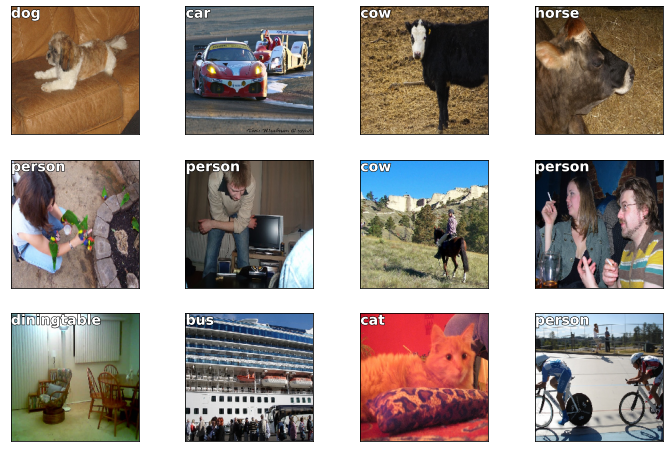

In [ ]:
# from keras.utils import np_utils
# from dlutils import unpreprocess

class_name = list(valid_batches.class_indices)

fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
  x,y = valid_batches.next()
  image = x[0]
  proba = model.predict(np.expand_dims(image,axis=0),batch_size=None, verbose=0, steps=None)
  class_id = np.argmax(proba)
  ax = show_img(deprocess_img(image),ax=ax)
  draw_text(ax, (0,0), class_name[class_id])
  

In [ ]:
# we create this time our data frame with the box coordiantes

filename = []
bbox = []
for image_id , annotation in trn_anno.items():
  filename.append(trn_fns[image_id])
  bbox.append(get_lrg(annotation)[0])

df = pd.DataFrame({'filename':filename,'bbox':bbox},columns=['filename','bbox']) 

In [ ]:
df.head()

filename                 bbox
0  000012.jpg  [155, 96, 196, 174]
1  000017.jpg   [89, 77, 314, 259]
2  000023.jpg     [2, 1, 241, 461]
3  000026.jpg   [89, 124, 248, 88]
4  000032.jpg  [103, 77, 272, 106]

In [ ]:
# create a training and validation set
df_train, df_valid = Split_Train_Valid(df,0.7)

In [ ]:
from tensorflow.keras.utils import Sequence
class DataFrame_Generator(Sequence):
    'Generates data from a Dataframe'
    def __init__(self, df, folder,preprocess_fct,batch_size=32, dim=(32,32), shuffle=True):
      'Initialization'
      self.preprocess_fct = preprocess_fct
      self.dim = dim
      self.batch_size = batch_size
      self.shuffle = shuffle
      self.folder = folder
  
      # Load the dataframe
      # the database is not so big, especially when resized in 224*224.
      # so we have either the option to load images online for each batch or
      # we can load all image at once 
      self.df = df
      self.n = len(df)            
      self.nb_iteration = int(np.floor(self.n  / self.batch_size))
      
      self.indexes = np.arange(len(self.df))
      if self.shuffle == True:
        np.random.shuffle(self.indexes)

    def __len__(self):
      'Denotes the number of batches per epoch'
      return self.nb_iteration
        
    def __getitem__(self, index):
      'Generate one batch of data'
      # Generate indexes of the batch
      indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

      # Generate data
      X, y = self.__data_generation(indexes)

      return X, y  

    def __data_generation(self, index):
      'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
      # Initialization
      X = np.empty((self.batch_size, *self.dim, 3))
      Y = np.zeros((self.batch_size,4)) 

      # Generate data
      for i, ID in enumerate(index):
        # Read the image
        img = Image.open(self.folder/self.df['filename'][ID])
        bb = self.df['bbox'][ID]

        # Resize according to the required size
        width, height = img.size
        RatioX = width/self.dim[0]
        RatioY = height/self.dim[1]

        img = np.asarray(img.resize(self.dim)) 

        # Resize the bbox accordingly
        bb = [bb[0]/RatioX,bb[1]/RatioY,bb[2]/RatioX,bb[3]/RatioY]

        # Same as done for VGG16
        X[i,] = self.preprocess_fct(np.asarray(img))
        
        Y[i] = bb

      return X, Y 

In [ ]:
train_gen = DataFrame_Generator(df_train,JPEGS,preprocess_input,bs,(sz,sz),True)
valid_gen = DataFrame_Generator(df_valid,JPEGS,preprocess_input,bs,(sz,sz),False)

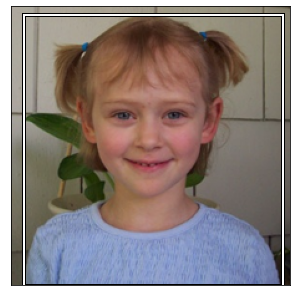

In [ ]:
x,y = next(iter(train_gen)) # This is just a python iterator, supporting next--> calling __get_item__

ax = show_img(deprocess_img(x[0]), figsize=(5,10))
draw_rect(ax, bb_hw(y[0]))

In [ ]:
sz=224
bs=64

net = VGG16(include_top=False, weights='imagenet', input_shape=(sz,sz,3))
for layer in net.layers:
        layer.trainable=False
        
x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(4, activation='linear', name='linear')(x)
model = Model(inputs=net.input, outputs=output_layer) 
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
optimizer=Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer,loss='mean_absolute_error', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/15
54/54 [==============================] - 18s 318ms/step - loss: 54.0469 - acc: 0.3524 - val_loss: 41.4653 - val_acc: 0.4253
Epoch 2/15
54/54 [==============================] - 17s 312ms/step - loss: 39.9639 - acc: 0.4861 - val_loss: 37.6224 - val_acc: 0.4986
Epoch 3/15
54/54 [==============================] - 17s 312ms/step - loss: 36.1168 - acc: 0.5538 - val_loss: 35.7039 - val_acc: 0.5340
Epoch 4/15
54/54 [==============================] - 17s 312ms/step - loss: 33.5763 - acc: 0.5799 - val_loss: 34.3743 - val_acc: 0.5625
Epoch 5/15
54/54 [==============================] - 17s 313ms/step - loss: 31.5995 - acc: 0.6030 - val_loss: 33.4342 - val_acc: 0.5856
Epoch 6/15
54/54 [==============================] - 17s 313ms/step - loss: 29.6899 - acc: 0.6302 - val_loss: 32.6529 - val_acc: 0.6005
Epoch 7/15
54/54 [==============================] - 17s 315ms/step - loss: 28.4310 - acc: 0.6597 - val_loss: 32.1542 - val_acc: 0.6101
Epoch 8/15
54/54 [==============================] - 17s

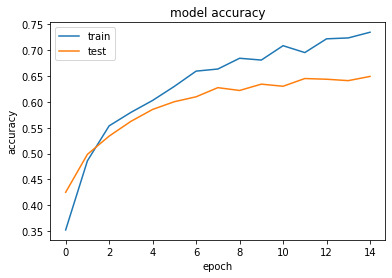

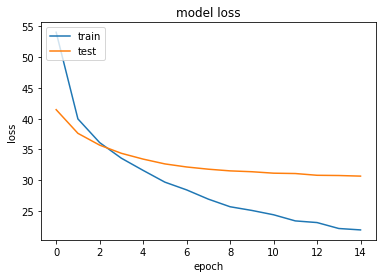

In [ ]:
epochs = 15

history = model.fit_generator(train_gen, steps_per_epoch=train_gen.nb_iteration,
                              epochs = epochs,
                              validation_data=valid_gen, validation_steps=valid_gen.nb_iteration)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
54/54 [==============================] - 18s 326ms/step - loss: 40.7001 - acc: 0.5417 - val_loss: 32.1489 - val_acc: 0.6182
Epoch 2/10
54/54 [==============================] - 17s 321ms/step - loss: 31.6315 - acc: 0.6117 - val_loss: 30.6516 - val_acc: 0.6386
Epoch 3/10
54/54 [==============================] - 17s 323ms/step - loss: 28.0036 - acc: 0.6609 - val_loss: 28.7835 - val_acc: 0.6359
Epoch 4/10
54/54 [==============================] - 17s 321ms/step - loss: 24.7001 - acc: 0.6921 - val_loss: 27.3583 - val_acc: 0.6522
Epoch 5/10
54/54 [==============================] - 17s 322ms/step - loss: 22.8774 - acc: 0.7170 - val_loss: 27.8421 - val_acc: 0.6481
Epoch 6/10
54/54 [==============================] - 17s 321ms/step - loss: 20.8465 - acc: 0.7390 - val_loss: 26.8905 - val_acc: 0.6440
Epoch 7/10
54/54 [==============================] - 17s 322ms/step - loss: 19.1667 - acc: 0.7575 - val_loss: 27.3513 - val_acc: 0.6644
Epoch 8/10
54/54 [==============================] - 17s

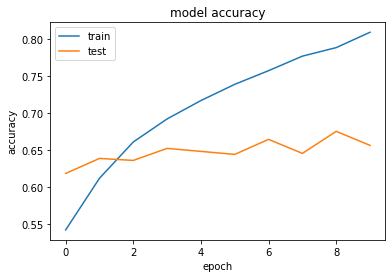

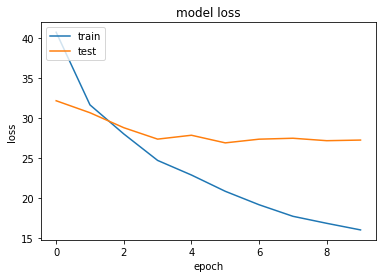

In [ ]:
FREEZE_LAYERS = 14

# free the first layers
for layer in model.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in model.layers[FREEZE_LAYERS:]:
    layer.trainable = True
    
model.compile(optimizer=optimizer,loss='mean_absolute_error', metrics=['acc'])    

print(model.summary())

epochs = 10

history = model.fit_generator(train_gen, steps_per_epoch=train_gen.nb_iteration,
                              epochs = epochs,
                              validation_data=valid_gen, validation_steps=valid_gen.nb_iteration)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

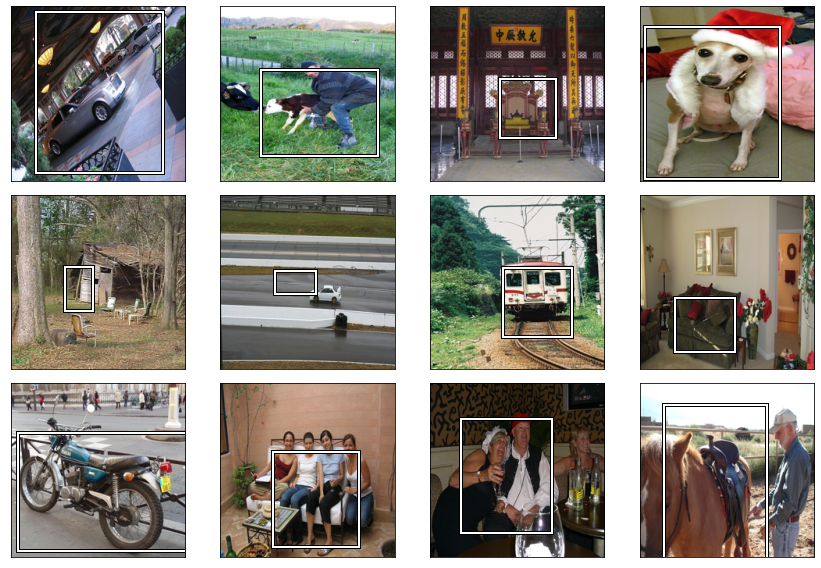

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    x,y = next(iter(valid_gen))
    image = x[i]
    bb = model.predict(np.expand_dims(image, axis=0), batch_size=None, verbose=0, steps=None)
    
    ax = show_img(deprocess_img(image), ax=ax)
    draw_rect(ax, bb_hw(bb[0]))

plt.tight_layout()

In [ ]:
# we create this time our data frame with the box coordiantes

filename = []
bbox = []
categories = []
for image_id , annotation in trn_anno.items():
  filename.append(trn_fns[image_id])
  large_annotation = get_lrg(annotation)
  bbox.append(large_annotation[0])
  categories.append(large_annotation[1])

df = pd.DataFrame({'filename':filename, 'cat':categories,'bbox':bbox},columns=['filename','cat','bbox']) 

In [ ]:
df.head()

filename  cat                 bbox
0  000012.jpg    7  [155, 96, 196, 174]
1  000017.jpg   13   [89, 77, 314, 259]
2  000023.jpg   15     [2, 1, 241, 461]
3  000026.jpg    7   [89, 124, 248, 88]
4  000032.jpg    1  [103, 77, 272, 106]

In [ ]:
df_train, df_valid = Split_Train_Valid(df,0.7)

In [ ]:
from tensorflow.keras.utils import Sequence
class DataFrame_single_Generator(Sequence):
    'Generates data from a Dataframe'
    def __init__(self, df, folder,preprocess_fct,batch_size=32, dim=(32,32), shuffle=True):
      'Initialization'
      self.preprocess_fct = preprocess_fct
      self.dim = dim
      self.batch_size = batch_size
      self.shuffle = shuffle
      self.folder = folder
  
      # Load the dataframe
      # the database is not so big, especially when resized in 224*224.
      # so we have either the option to load images online for each batch or
      # we can load all image at once 
      self.df = df
      self.n = len(df)            
      self.nb_iteration = int(np.floor(self.n  / self.batch_size))
      
      self.indexes = np.arange(len(self.df))
      if self.shuffle == True:
        np.random.shuffle(self.indexes)

    def __len__(self):
      'Denotes the number of batches per epoch'
      return self.nb_iteration
        
    def __getitem__(self, index):
      'Generate one batch of data'
      # Generate indexes of the batch
      indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

      # Generate data
      X, y = self.__data_generation(indexes)

      return X, y  

    def __data_generation(self, index):
      'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
      # Initialization
      X = np.empty((self.batch_size, *self.dim, 3))
      Y = []
      bbs=[]
      cats=[]
      # Generate data
      for i, ID in enumerate(index):
        # Read the image
        category_lbl=np.zeros(20).astype(int)
        img = Image.open(self.folder/self.df['filename'][ID])
        bb = self.df['bbox'][ID]
        category = self.df['cat'][ID]
        
        # Resize according to the required size
        width, height = img.size
        RatioX = width/self.dim[0]
        RatioY = height/self.dim[1]

        img = np.asarray(img.resize(self.dim)) 

        # Resize the bbox accordingly
        bb = np.asarray([bb[0]/RatioX,bb[1]/RatioY,bb[2]/RatioX,bb[3]/RatioY])
        
        # Same as done for VGG16
        X[i,] = self.preprocess_fct(np.asarray(img))
        #print(category)
        category_lbl[category-1]=1
        bbs.append(bb)
        cats.append(category_lbl)
        
      
      bbs=np.asarray(bbs)
      cats=np.asarray(cats)

      return X, [bbs,cats]

In [ ]:
single_train_gen = DataFrame_single_Generator(df_train,JPEGS,preprocess_input,bs,(sz,sz),True)
single_valid_gen = DataFrame_single_Generator(df_valid,JPEGS,preprocess_input,bs,(sz,sz),False)

In [ ]:
x_batch,y_batch = next(iter(single_train_gen))
y_batch[1][1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

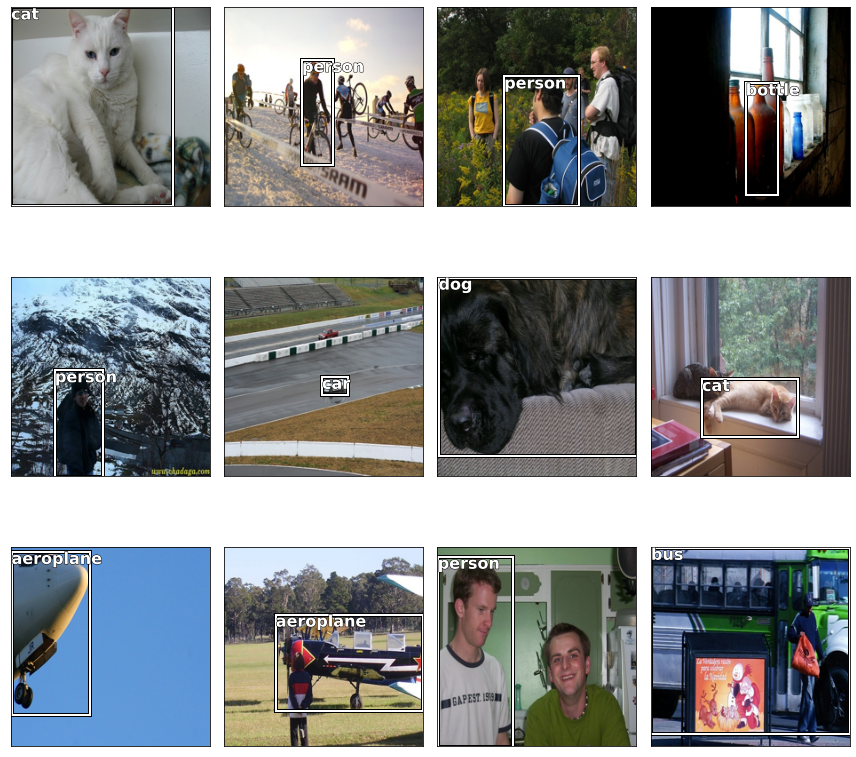

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(12, 12))

for i,ax in enumerate(axes.flat):
    x_batch,y_batch = next(iter(single_train_gen))
    bb = y_batch[0][i]
    cat = y_batch[1][i]    
    image = x_batch[i]

    c = np.argmax(cat)
    ax = show_img(deprocess_img(image), ax=ax)
    draw_rect(ax, bb_hw(bb))
    draw_text(ax, [bb[0],bb[1]], cats[(np.argmax(cat))+1], sz=16)

plt.tight_layout()

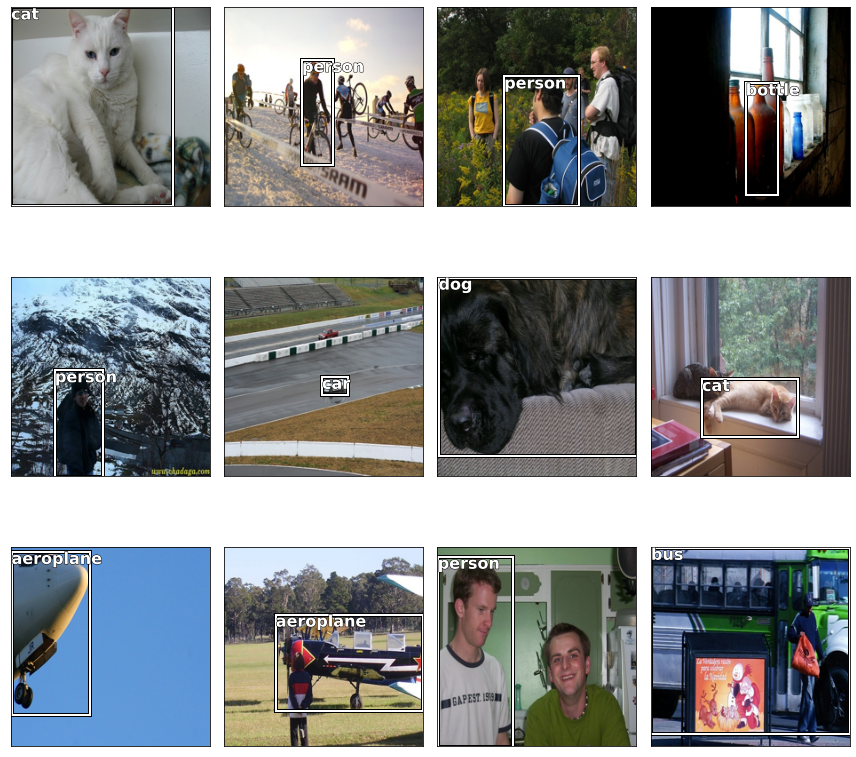

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(12, 12))

for i,ax in enumerate(axes.flat):
    x_batch,y_batch = next(iter(single_train_gen))
    bb = y_batch[0][i]
    cat = y_batch[1][i]    
    image = x_batch[i]

    c = np.where(cat == 1)
    b = '/n'.join(set(cats[o+1] for o in c[0]))
    ax = show_img(deprocess_img(image), ax=ax)
    draw_rect(ax, bb_hw(bb))
    draw_text(ax, [bb[0],bb[1]], b, sz=16)

plt.tight_layout()

In [ ]:
sz=224
bs=64

net = VGG16(include_top=False, weights='imagenet', input_shape=(sz,sz,3))
for layer in net.layers:
        layer.trainable=False
 
y = net.output
y = Flatten()(y)
y = Dropout(0.5)(y)

# branch for the regression --> BBox
output_layer_bbox = Dense(4, activation='linear', name='layer_bbox')(y)

# Branch for the classification --> Category
output_layer_class = Dense(20, activation='softmax', name='layer_class')(y)

model = Model(inputs=net.input, outputs=[output_layer_bbox,output_layer_class])

In [ ]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]


(None, 224, 224, 3) <dtype: 'float32'>
(None, 4) <dtype: 'float32'>
(None, 20) <dtype: 'float32'>


[None, None]

In [ ]:
optimizer=Adam(lr=1e-4)
model.compile(optimizer=optimizer,loss=['mean_absolute_error','categorical_crossentropy'], metrics=['accuracy'],loss_weights=[1., 5.])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 20

history = model.fit_generator(single_train_gen, steps_per_epoch=single_train_gen.nb_iteration,epochs = epochs,
                              validation_data=single_valid_gen,validation_steps=single_valid_gen.nb_iteration)

print(history.history.keys())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
27/27 [==============================] - 23s 668ms/step - loss: 199.5326 - layer_bbox_loss: 60.7561 - layer_class_loss: 27.7553 - layer_bbox_accuracy: 0.3536 - layer_class_accuracy: 0.1661 - val_loss: 102.6761 - val_layer_bbox_loss: 42.6375 - val_layer_class_loss: 12.0077 - val_layer_bbox_accuracy: 0.4517 - val_layer_class_accuracy: 0.3764
Epoch 2/20
27/27 [==============================] - 17s 612ms/step - loss: 114.6840 - layer_bbox_loss: 42.2773 - layer_class_loss: 14.4813 - layer_bbox_accuracy: 0.4618 - layer_class_accuracy: 0.3866 - val_loss: 82.3518 - val_layer_bbox_loss: 39.6162 - val_layer_class_loss: 8.5471 - val_layer_bbox_accuracy: 0.5014 - val_layer_class_accuracy: 0.5256
Epoch 3/20
27/27 [==============================] - 17s 615ms/step - loss: 82.5922 - layer_bbox_loss: 38.6114 - layer_class_loss: 8.7962 - layer_bbox_accuracy: 0.5208 - layer_class_accuracy: 0.5411 - val_loss: 74.5888 - val_layer_bbox_loss: 37.7070 - val_layer_class_loss: 7.3764 - val_layer_bbox

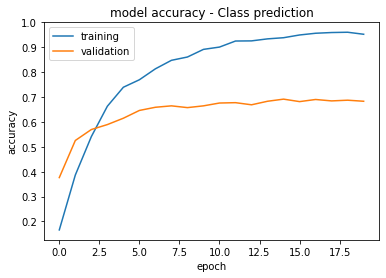

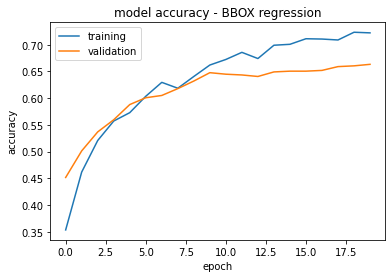

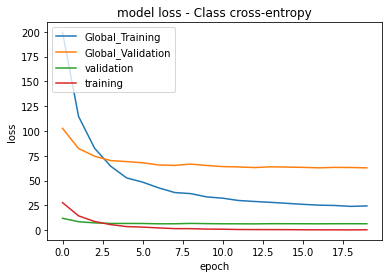

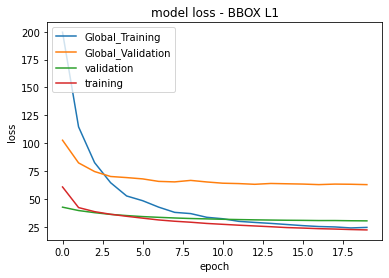

In [ ]:
# summarize history for accuracy for Class
plt.plot(history.history['layer_class_accuracy'])
plt.plot(history.history['val_layer_class_accuracy'])
plt.title('model accuracy - Class prediction')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
plt.show()

# summarize history for accuracy for bbox regression
plt.plot(history.history['layer_bbox_accuracy'])
plt.plot(history.history['val_layer_bbox_accuracy'])
plt.title('model accuracy - BBOX regression')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
plt.show()

# summarize history for loss for Class
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_layer_class_loss'])
plt.plot(history.history['layer_class_loss'])
plt.title('model loss - Class cross-entropy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Global_Training', 'Global_Validation','validation','training'], loc='upper left')
plt.show()

# summarize history for loss for BBOX
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_layer_bbox_loss'])
plt.plot(history.history['layer_bbox_loss'])
plt.title('model loss - BBOX L1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Global_Training', 'Global_Validation','validation','training'], loc='upper left')
plt.show()

In [ ]:
FREEZE_LAYERS = 14

# free the first layers
for layer in model.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in model.layers[FREEZE_LAYERS:]:
    layer.trainable = True
    
optimizer=Adam(lr=1e-5)
model.compile(optimizer=optimizer,loss=['mean_absolute_error','categorical_crossentropy'], 
              metrics=['accuracy'],loss_weights=[1., 20.])
 

epochs = 20

history = model.fit_generator(single_train_gen, steps_per_epoch=single_train_gen.nb_iteration,
                              epochs = epochs,
                              validation_data=single_valid_gen, validation_steps=single_valid_gen.nb_iteration)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
27/27 [==============================] - 19s 643ms/step - loss: 27.7422 - layer_bbox_loss: 21.7066 - layer_class_loss: 0.3018 - layer_bbox_accuracy: 0.7211 - layer_class_accuracy: 0.9606 - val_loss: 159.0082 - val_layer_bbox_loss: 30.2291 - val_layer_class_loss: 6.4390 - val_layer_bbox_accuracy: 0.6634 - val_layer_class_accuracy: 0.6903
Epoch 2/20
27/27 [==============================] - 17s 629ms/step - loss: 27.9926 - layer_bbox_loss: 21.5280 - layer_class_loss: 0.3232 - layer_bbox_accuracy: 0.7338 - layer_class_accuracy: 0.9624 - val_loss: 160.2470 - val_layer_bbox_loss: 30.1560 - val_layer_class_loss: 6.5046 - val_layer_bbox_accuracy: 0.6619 - val_layer_class_accuracy: 0.6903
Epoch 3/20
27/27 [==============================] - 17s 627ms/step - loss: 25.6528 - layer_bbox_loss: 21.3301 - layer_class_loss: 0.2161 - layer_bbox_accuracy: 0.7240 - layer_class_accuracy: 0.9699 - val_loss: 158.6473 - val_layer_bbox_loss: 30.1447 - val_layer_class_loss: 6.4251 - val_layer_bbox_ac

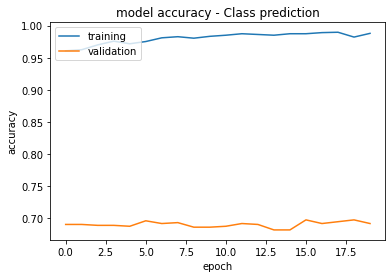

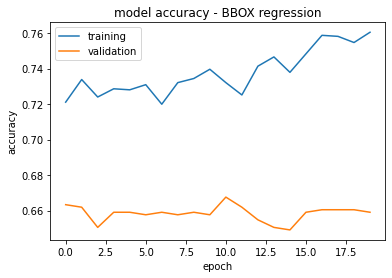

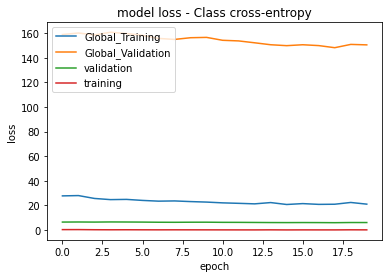

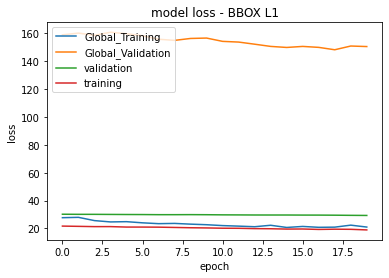

In [ ]:
# summarize history for accuracy for Class
plt.plot(history.history['layer_class_accuracy'])
plt.plot(history.history['val_layer_class_accuracy'])
plt.title('model accuracy - Class prediction')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
plt.show()

# summarize history for accuracy for bbox regression
plt.plot(history.history['layer_bbox_accuracy'])
plt.plot(history.history['val_layer_bbox_accuracy'])
plt.title('model accuracy - BBOX regression')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
plt.show()

# summarize history for loss for Class
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_layer_class_loss'])
plt.plot(history.history['layer_class_loss'])
plt.title('model loss - Class cross-entropy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Global_Training', 'Global_Validation','validation','training'], loc='upper left')
plt.show()

# summarize history for loss for BBOX
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_layer_bbox_loss'])
plt.plot(history.history['layer_bbox_loss'])
plt.title('model loss - BBOX L1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Global_Training', 'Global_Validation','validation','training'], loc='upper left')
plt.show()

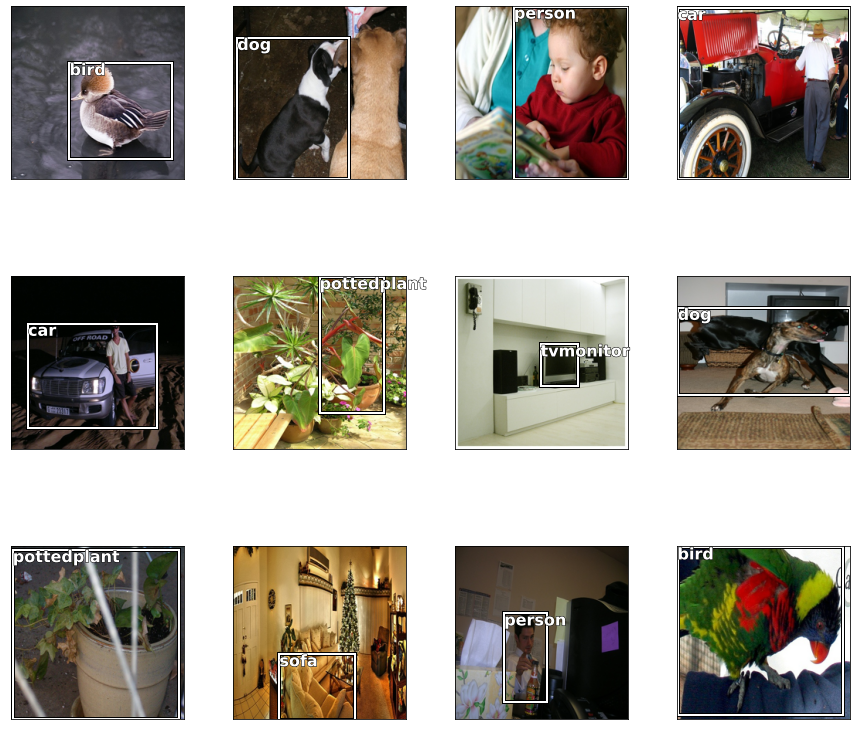

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(12, 12))

for i,ax in enumerate(axes.flat):
    x_batch,y_batch = next(iter(single_valid_gen))
    bb = y_batch[0][i]
    cat = y_batch[1][i]    
    image = x_batch[i]

    c = np.argmax(cat)
    ax = show_img(deprocess_img(image), ax=ax)
    draw_rect(ax, bb_hw(bb))
    draw_text(ax, [bb[0],bb[1]], cats[(np.argmax(cat))+1], sz=16)

plt.tight_layout()